# Task 4 -> Sales Prediction using Python

# Importing Required Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style("whitegrid")
sns.set_context("poster")

%matplotlib inline

# Loading the Dataset

In [2]:
from google.colab import files
uploaded = files.upload()

Saving advertising.csv to advertising.csv


In [3]:
sales_df=pd.read_csv("/content/advertising.csv")
print("Size of the data:", sales_df.shape)
sales_df.head()

Size of the data: (200, 4)


,TV,Radio,Newspaper,Sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,12.0
3,151.5,41.3,58.5,16.5
4,180.8,10.8,58.4,17.9


# Getting summary of statistics of the data

In [4]:
sales_df.describe()

,TV,Radio,Newspaper,Sales
count,200.000000,200.000000,200.000000,200.000000
mean,147.042500,23.264000,30.554000,15.130500
std,85.854236,14.846809,21.778621,5.283892
min,0.700000,0.000000,0.300000,1.600000
25%,74.375000,9.975000,12.750000,11.000000
50%,149.750000,22.900000,25.750000,16.000000
75%,218.825000,36.525000,45.100000,19.050000
max,296.400000,49.600000,114.000000,27.000000


# Exploratory Data Analysis -> Getting Correlation of features

In [5]:
sales_df.corr()

,TV,Radio,Newspaper,Sales
TV,1.000000,0.054809,0.056648,0.901208
Radio,0.054809,1.000000,0.354104,0.349631
Newspaper,0.056648,0.354104,1.000000,0.157960
Sales,0.901208,0.349631,0.157960,1.000000


# Visualizing the Correlation

<Axes: >

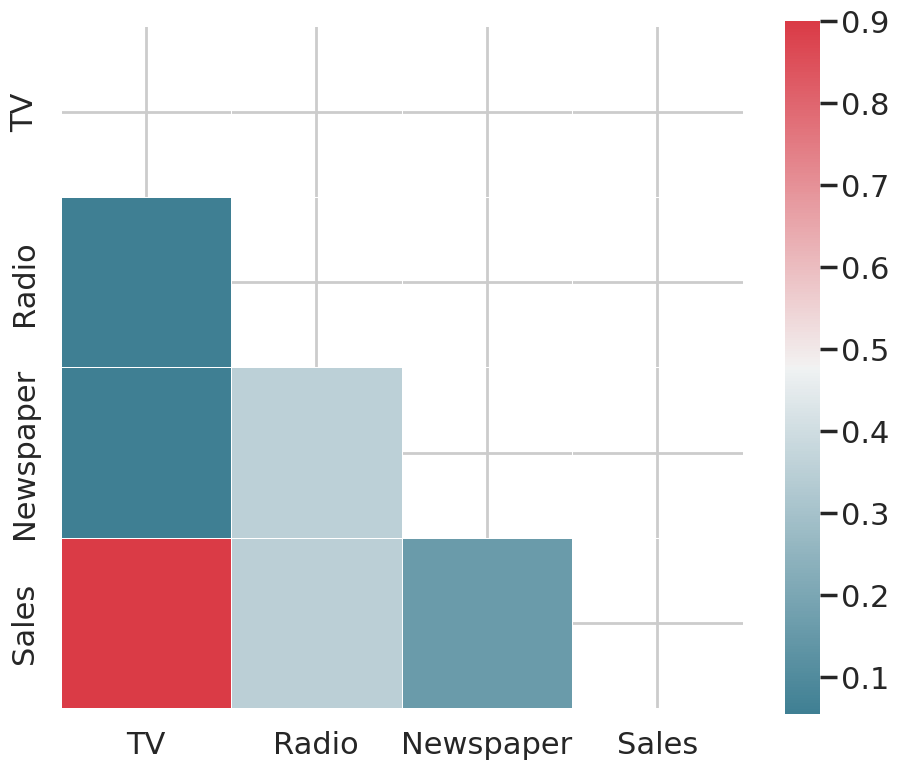

In [7]:
mask = np.zeros_like(sales_df.corr(), dtype=bool)
mask[np.triu_indices_from(mask)] = True

f, ax = plt.subplots(figsize=(11, 9))

cmap = sns.diverging_palette(220, 10, as_cmap=True)

sns.heatmap(sales_df.corr(), mask=mask, cmap=cmap, vmax=.9, square=True, linewidths=.5, ax=ax)

# Visualizing the relationship using scatterplot

Text(0.5, 1.0, 'Sales vs Radio')

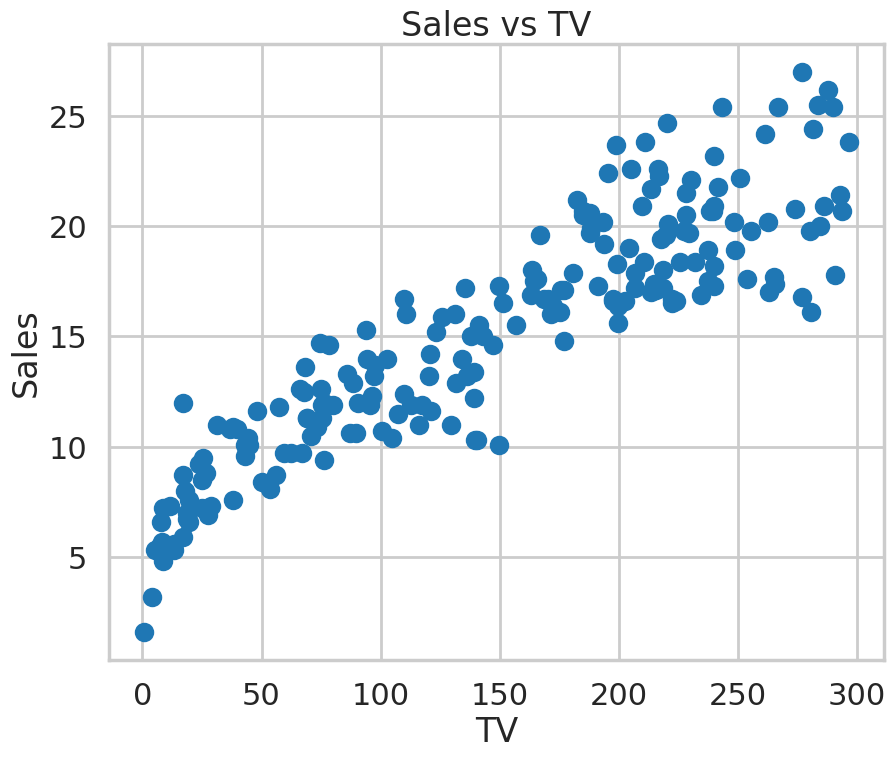

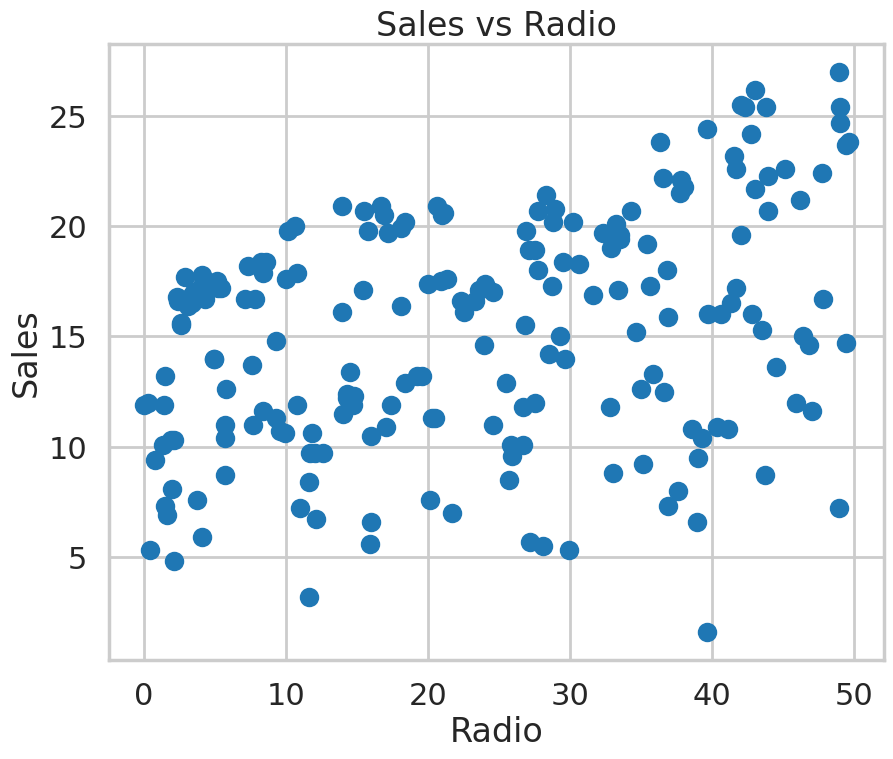

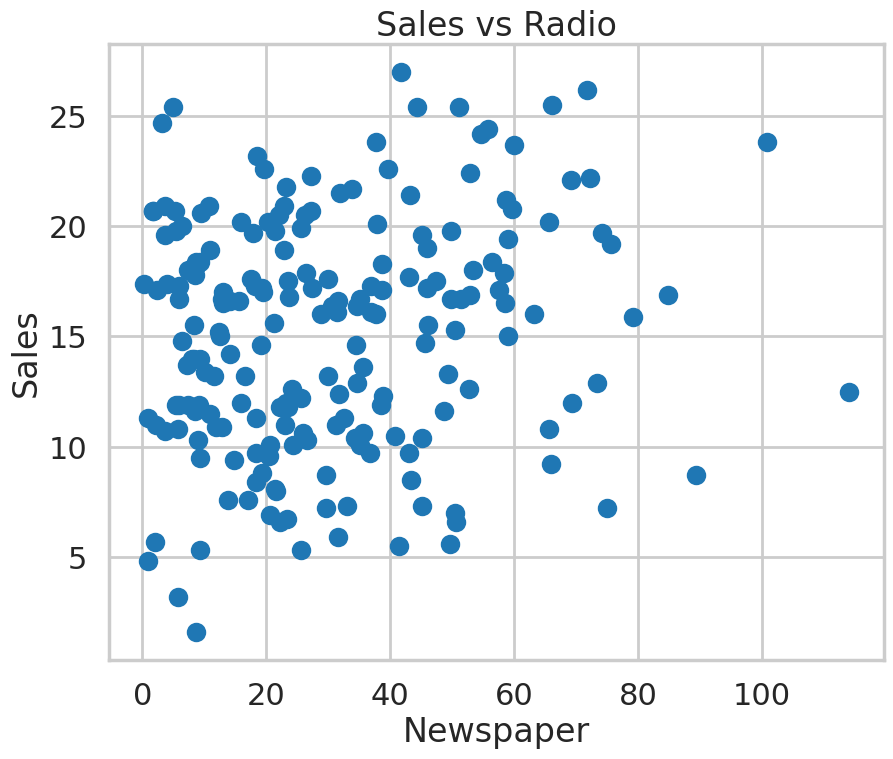

In [8]:
f, ax = plt.subplots(figsize=(10, 8))
plt.scatter(sales_df["TV"], sales_df["Sales"])
plt.xlabel("TV")
plt.ylabel("Sales")
plt.title("Sales vs TV")

f, ax = plt.subplots(figsize=(10, 8))
plt.scatter(sales_df["Radio"], sales_df["Sales"])
plt.xlabel("Radio")
plt.ylabel("Sales")
plt.title("Sales vs Radio")

f, ax = plt.subplots(figsize=(10, 8))
plt.scatter(sales_df["Newspaper"], sales_df["Sales"])
plt.xlabel("Newspaper")
plt.ylabel("Sales")
plt.title("Sales vs Radio")

# Visualizing the relationship using scatterplot

Text(0.5, 1.0, 'Radio vs Radio')

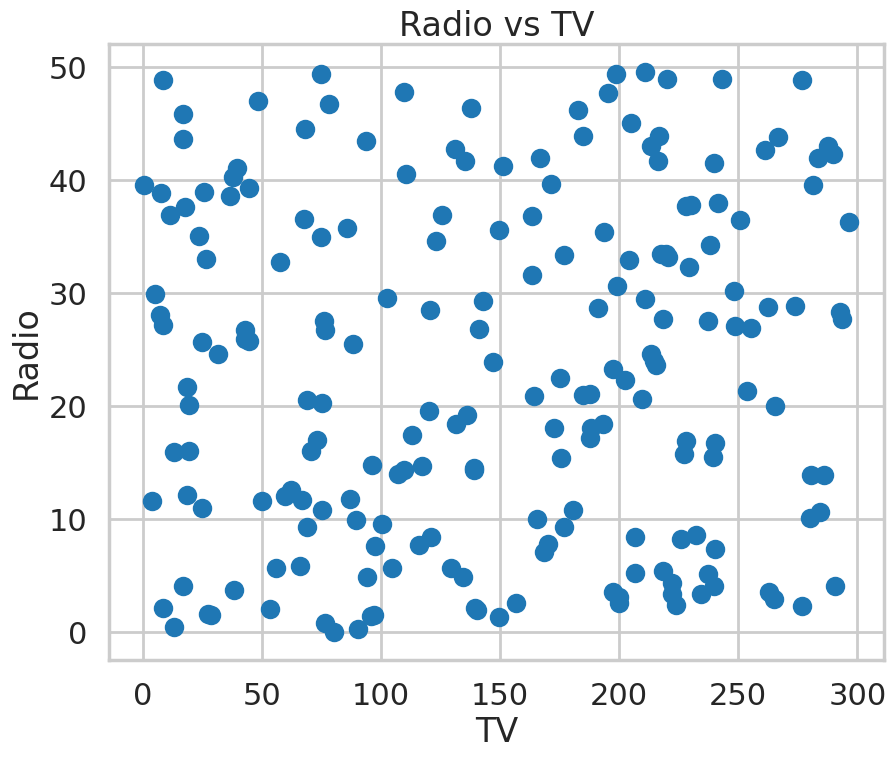

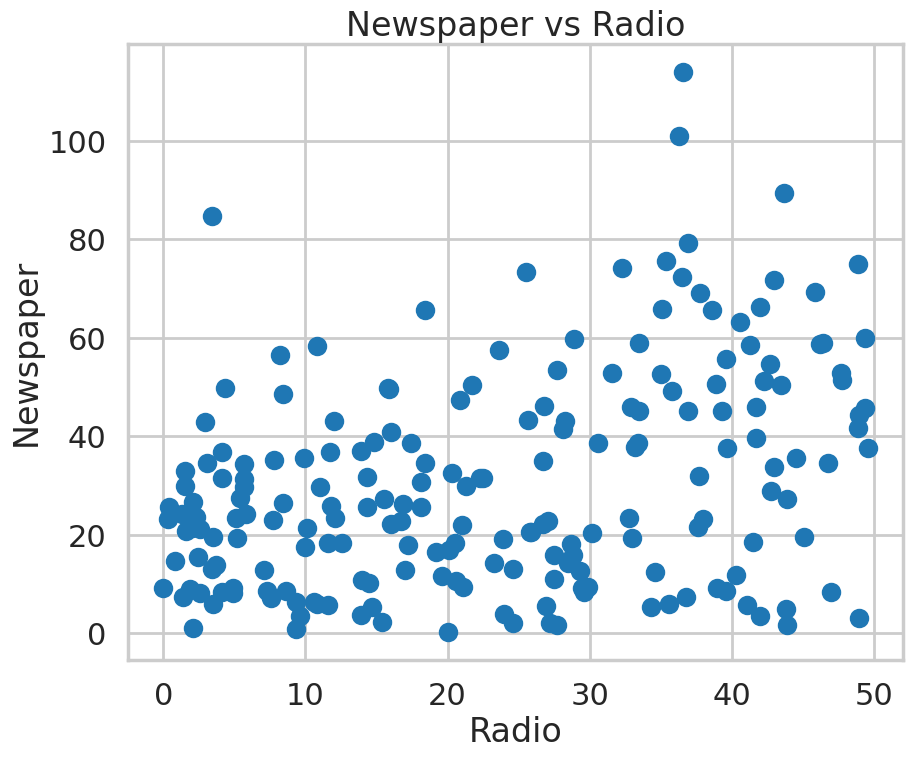

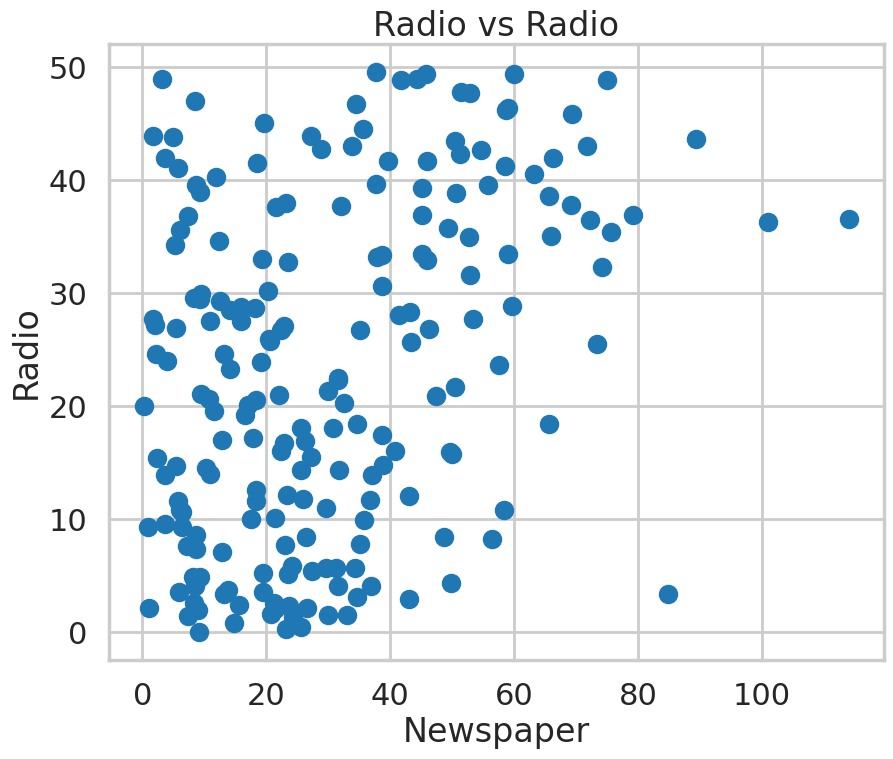

In [9]:
f, ax = plt.subplots(figsize=(10, 8))
plt.scatter(sales_df["TV"], sales_df["Radio"])
plt.xlabel("TV")
plt.ylabel("Radio")
plt.title("Radio vs TV")

f, ax = plt.subplots(figsize=(10, 8))
plt.scatter(sales_df["Radio"], sales_df["Newspaper"])
plt.xlabel("Radio")
plt.ylabel("Newspaper")
plt.title("Newspaper vs Radio")

f, ax = plt.subplots(figsize=(10, 8))
plt.scatter(sales_df["Newspaper"], sales_df["Radio"])
plt.xlabel("Newspaper")
plt.ylabel("Radio")
plt.title("Radio vs Radio")

# Preparing the Data for Modelling

-> Separate the predictor and the target variable

In [10]:
x = sales_df.drop("Sales", axis = 1)
y = sales_df["Sales"]

print(f"==x (predictors)==\nSize: {x.shape}\n{x.head()}\n Data Type: {type(x.head())} ")
print(f"\n==y (target)==\nSize: {y.shape}\n{y.head()}\n{type(y.head())}")

==x (predictors)==
Size: (200, 3)
      TV  Radio  Newspaper
0  230.1   37.8       69.2
1   44.5   39.3       45.1
2   17.2   45.9       69.3
3  151.5   41.3       58.5
4  180.8   10.8       58.4
 Data Type: <class 'pandas.core.frame.DataFrame'> 

==y (target)==
Size: (200,)
0    22.1
1    10.4
2    12.0
3    16.5
4    17.9
Name: Sales, dtype: float64
<class 'pandas.core.series.Series'>


# Libraries for Preprocessing

In [11]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import PolynomialFeatures

# Train-Test Splitting

In [12]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.25, random_state = 42)

print("x_train size:", x_train.shape)
print("y_train size:", y_train.shape)
print("\nx_test size:", x_test.shape)
print("y_test size:", y_test.shape)

x_train size: (150, 3)
y_train size: (150,)

x_test size: (50, 3)
y_test size: (50,)


# Initializing dataframe that will store the results

In [29]:
df_results = pd.DataFrame(columns = ["Predictor/s", "R2", "MAE", "MSE", "RMSE", "Cross-Val Mean"])

# Building then Evaluating the Models

-> Linear Regression

# Libraries For Building the Model and Validation of the Model

In [30]:
from sklearn.linear_model import LinearRegression, Lasso, Ridge
from sklearn.pipeline import make_pipeline

from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
from sklearn.model_selection import cross_val_score

In [31]:
# -> Make a function for Linear Regression with default values
def linreg_model(xtrain, xtest):
    # -> Initialize algorithm
    linreg = LinearRegression()

    # -> Fit the data
    linreg.fit(xtrain, y_train)

    # -> Evaluate the model
    y_pred = linreg.predict(xtest)

    print("R2:", r2_score(y_pred, y_test))
    print("MAE:", mean_absolute_error(y_pred, y_test))
    print("MSE:", mean_squared_error(y_pred, y_test))
    print("RMSE:", np.sqrt(mean_squared_error(y_pred, y_test)))

    f, ax = plt.subplots(figsize=(11, 9))
    plt.scatter(y_pred, y_test)
    plt.xlabel("Predicted")
    plt.ylabel("Actual")
    plt.title("Actual vs Predicted")

    return {"R2": r2_score(y_pred, y_test) * 100, "MAE": mean_absolute_error(y_pred, y_test),
            "MSE": mean_squared_error(y_pred, y_test), "RMSE": np.sqrt(mean_squared_error(y_pred, y_test))}

# Using all as the Predictors

R2: 0.90514835876105
MAE: 1.1199940713361773
MSE: 2.404067444711889
RMSE: 1.5505055448826648
Cross-Val Results: [0.89391193 0.84835255 0.91336339 0.93740449 0.90972209 0.92995146
 0.85494586 0.83727721 0.86267846 0.927566  ]
Cross-Val Mean: 0.8915173447734139


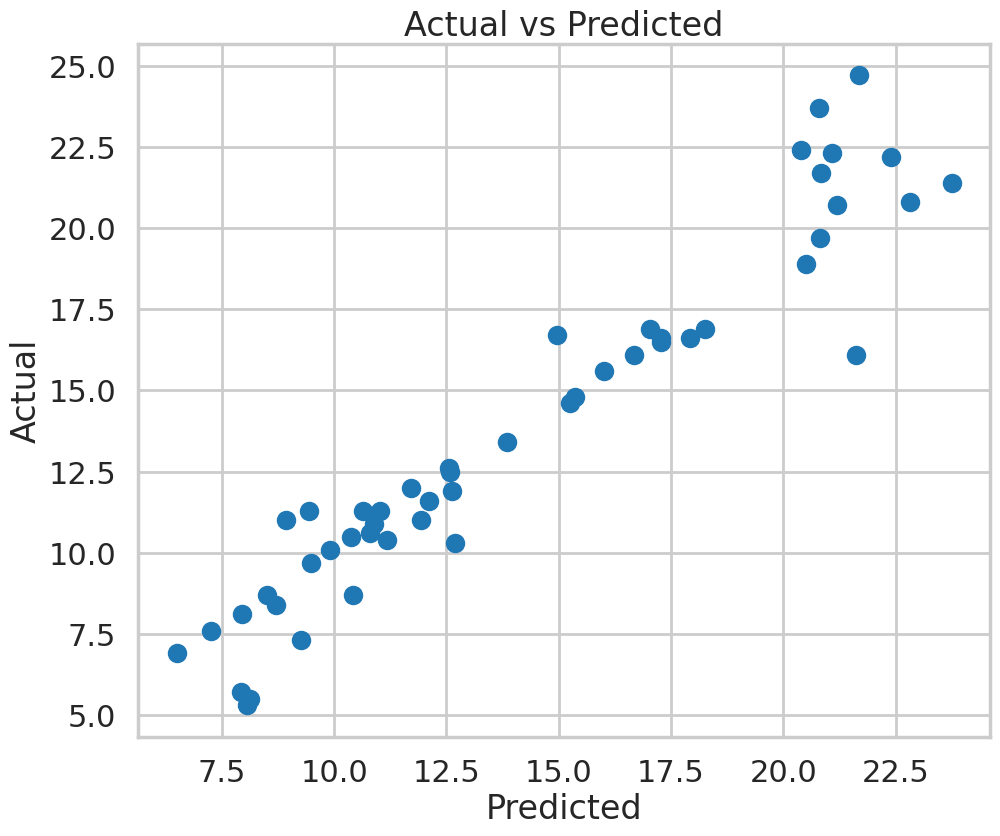

In [32]:
# -> Predicting and gettimg results
linreg_all_results = linreg_model(x_train, x_test)

# -> Cross Validation
cv_score = cross_val_score(LinearRegression(), x, y, cv=10)

print("Cross-Val Results:", cv_score)
print("Cross-Val Mean:", cv_score.mean())

# -> Compiling the validation results
linreg_all_results.update({"Predictor/s":"All", "Cross-Val Mean": cv_score.mean() * 100})

# -> Adding the results to the dataframe
df_results = pd.concat([df_results, pd.DataFrame([linreg_all_results])], ignore_index=True)

# Using only TV as Predictor

R2: 0.7550093961233676
MAE: 1.8651146911099161
MSE: 5.513351187165511
RMSE: 2.3480526372220685
Cross-Val Results: [0.83283252 0.72444029 0.77846467 0.87955404 0.76065371 0.88067487
 0.83508629 0.66102314 0.73611831 0.83119639]
Cross-Val Mean: 0.7920044239035755


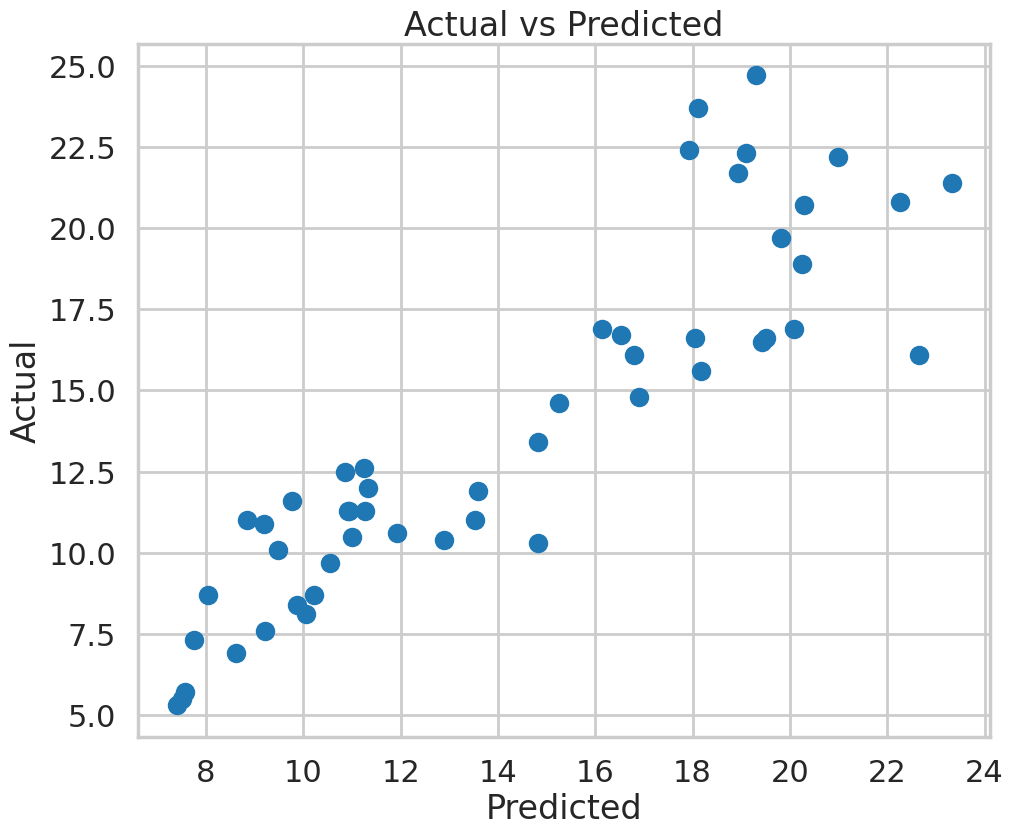

In [33]:
# -> Predicting and getting results
linreg_TV_results = linreg_model(x_train["TV"].values.reshape(-1,1), x_test["TV"].values.reshape(-1,1))

# -> Cross Validation
cv_score = cross_val_score(LinearRegression(), x["TV"].values.reshape(-1, 1), y, cv=10)

print("Cross-Val Results:", cv_score)
print("Cross-Val Mean:", cv_score.mean())

# -> Compiling validation results
linreg_TV_results.update({"Predictor/s":"TV", "Cross-Val Mean": cv_score.mean() * 100})

# -> Adding the results to the dataframe
df_results = pd.concat([df_results, pd.DataFrame([linreg_TV_results])], ignore_index=True)

# Using TV and Radio as Predictors

R2: 0.9065132059179849
MAE: 1.1144571493849897
MSE: 2.356396290987084
RMSE: 1.535055794095799
Cross-Val Results: [0.89398144 0.84855767 0.91492421 0.93757095 0.91060097 0.93060159
 0.85490051 0.83752431 0.86285024 0.92852052]
Cross-Val Mean: 0.8920032415598959


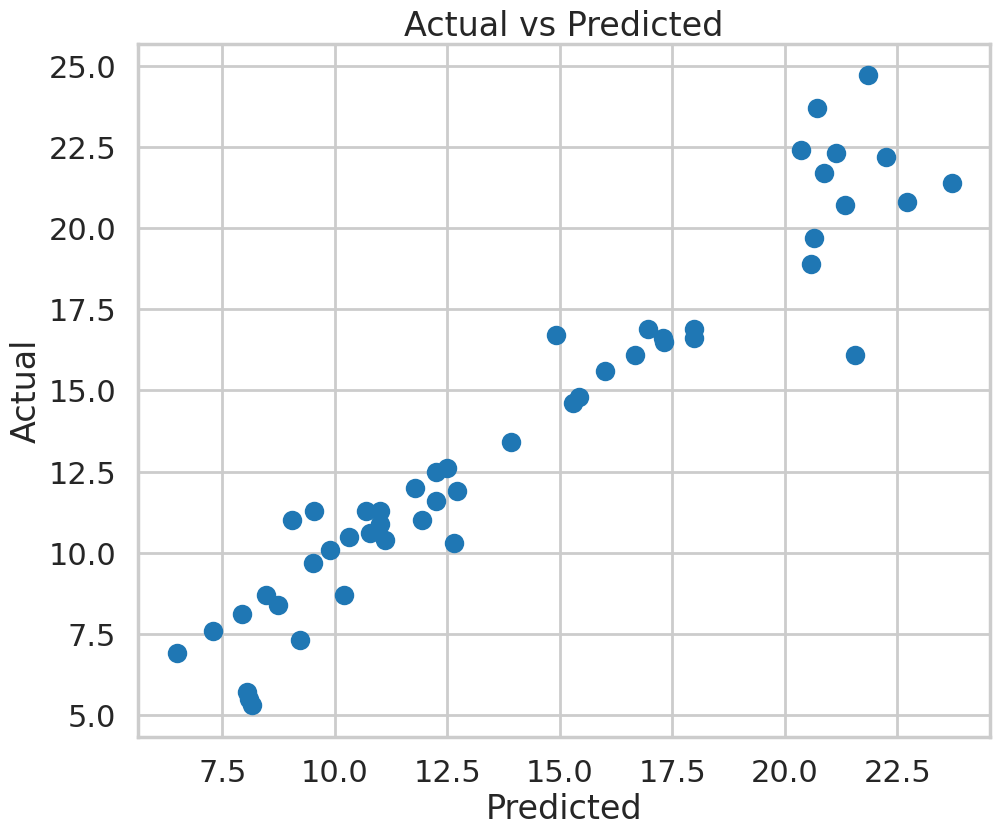

In [34]:
linreg_TVR_results = linreg_model(x_train[["TV", "Radio"]], x_test[["TV", "Radio"]])

# -> Cross Validation
cv_score = cross_val_score(LinearRegression(), x[["TV", "Radio"]], y, cv=10)

print("Cross-Val Results:", cv_score)
print("Cross-Val Mean:", cv_score.mean())

# -> Compiling validation results
linreg_TVR_results.update({"Predictor/s":"TV & Radio", "Cross-Val Mean": cv_score.mean() * 100})

# -> Adding the results to the dataframe
df_results = pd.concat([df_results, pd.DataFrame([linreg_TVR_results])], ignore_index=True)

# Conclusion considering all the predictors altogether as well as alone and also with other.

In [35]:
df_results.set_index("Predictor/s", inplace = True)
df_results.head()

,R2,MAE,MSE,RMSE,Cross-Val Mean
Predictor/s,,,,,
All,90.514836,1.119994,2.404067,1.550506,89.151734
TV,75.500940,1.865115,5.513351,2.348053,79.200442
TV & Radio,90.651321,1.114457,2.356396,1.535056,89.200324
